## Exercise 1

Create a vectorized version of log and exp math function for 1D array A = [2, 5, 10, 3, 8]

Results should be: 
+ [0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
+ [7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]

In [3]:
import numpy as np
from numba import jit, vectorize, cuda, float64
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
@vectorize([float64(float64)], target='parallel', fastmath=True)
def log(x):
    return np.log(x)

@vectorize([float64(float64)], target='parallel', fastmath=True)
def exp(x):
    return np.exp(x)

A = [2, 5, 10, 3, 8]

print(log(A))
print(exp(A))

[0.69314718 1.60943791 2.30258509 1.09861229 2.07944154]
[7.38905610e+00 1.48413159e+02 2.20264658e+04 2.00855369e+01
 2.98095799e+03]


## Exerice 2
Compute the value of a Gaussian probability density function at $x$ with $mean = 1$, $\sigma = 1$, lower and upper bound in $(-3, 3)$ and $size = 100000$

201 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
347 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


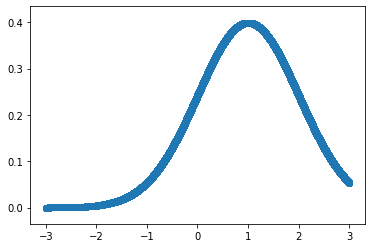

In [6]:
@vectorize([float64(float64)], target='parallel', fastmath=True)
def gaus(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-(x-1)**2/2)

def gausn(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-(x-1)**2/2)

x = np.linspace(-3, 3, 100000)
%timeit gaus(x)
%timeit gausn(x)
plt.scatter(x, gaus(x))
plt.show()

## Exercise 3

Create a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. 
Plot the data before and after the application of the zero_suppress function.

$thresold = 15$

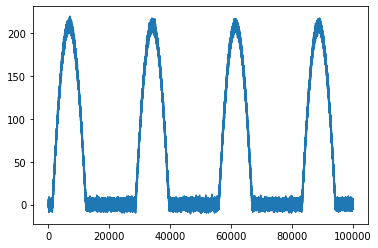

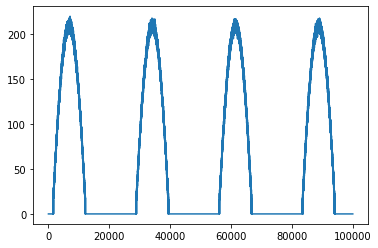

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
data = ((pulses * 300) + noise).astype(np.int16)

plt.plot(np.arange(n), data)
plt.show()

@vectorize([float64(float64)], target='parallel', fastmath=True)
def cleaner(x):
    if x < 15:
        return 0
    else:
        return x
    
cleaned_data = cleaner(data)
plt.plot(np.arange(n), cleaned_data)
plt.show()

## Exercise 4

Calculate the Sigmoid kernel between the matrix X and Y defined as below. The Sigmoid kernel is defined as:

$k(x,y) = \tanh(\alpha x^T y + c) $

In [22]:
X = np.random.rand(3,3)
Y = np.random.rand(3,3)

@vectorize([float64(float64, float64)], target='parallel', fastmath=True)
def sig_ker(x, y):
    a = 3
    c = 2
    return np.tanh(a*x*y+c)

res = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        res[i][j] = np.sum(sig_ker(X.T[i],Y.T[j]))

res

array([[2.97746501, 2.95817132, 2.93294155],
       [2.9941094 , 2.96194972, 2.94411457],
       [2.98765316, 2.95529249, 2.94853108]])

## Exercise 5

Create a kernel function similar to the ```double_kernel``` see during the lecture and create a new function that takes a 3 dimensional matrix as input calculating the $cos$ for each element and then returns the result. The shape of the matrix must be $256X256X256$. The matrix can be randomly generated

## Exercise 6

Create a matrix multiplication kernel function, called ```matmul``` that takes as input two 2D matrices:
+ A of shape $24x12$
+ B of shape $12x22$
and that computes the multiplication and put the results into a third matrix C of shape $24x12$

A and B must be randomly generated and only int values are allowed.


In [ ]:
from __future__ import division
from numba import cuda
import numpy
import math

# complete the code
@cuda.jit
def matmul(A, B, C):
    """Perform matrix multiplication of C = A * B
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp

# Initialize the data arrays
A = 
B = 

# Configure the blocks
threadsperblock = 
blockspergrid_x = 
blockspergrid_y = 
blockspergrid = 

